In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
sns.set_style('white', {'font.sans-serif':['simhei','Arial']})
pd.set_option("display.max_rows", 1000)

In [2]:
iris = load_iris()
X = iris['data']
Y = iris['target']

display(X[:5])
display(pd.Series(Y).value_counts())

Y = Y.reshape(-1, 1) # Y的形状转换为[150, 1]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

0    50
1    50
2    50
dtype: int64

In [3]:
data = pd.DataFrame(np.concatenate((X, Y), axis=1),
                    columns=["萼片长", "萼片宽", "花瓣长", "花瓣宽", "种类"])
kind_dict = {
    0:"山鸢尾",
    1:"杂色鸢尾",
    2:"维吉尼亚鸢尾"
}
data["种类"] = data["种类"].map(kind_dict)
data.head()

,萼片长,萼片宽,花瓣长,花瓣宽,种类
0,5.1,3.5,1.4,0.2,山鸢尾
1,4.9,3.0,1.4,0.2,山鸢尾
2,4.7,3.2,1.3,0.2,山鸢尾
3,4.6,3.1,1.5,0.2,山鸢尾
4,5.0,3.6,1.4,0.2,山鸢尾


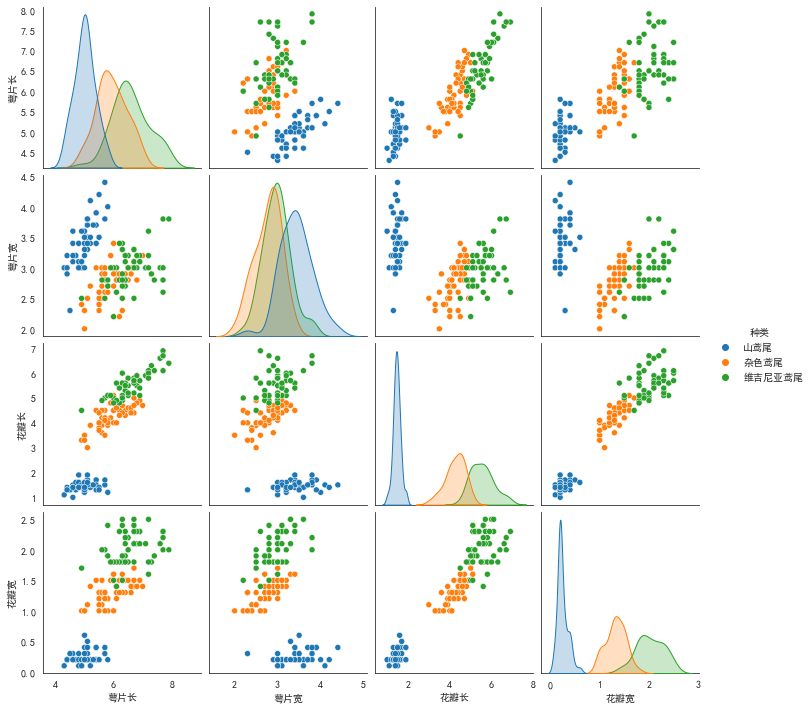

In [4]:
sns.pairplot(data, hue='种类')
# plt.savefig('../../期末作业/figures/数据分布.png', dpi=900)

In [5]:
# data = pd.DataFrame(np.concatenate((X, Y), axis=1),
#                     columns=["x1", "x2", "x3", "x4", "y"])
# data["y"] = data["y"].astype("int64")
# data.head()

In [6]:
# sns.pairplot(data, hue="y")

In [7]:
scaler = MinMaxScaler()
data.iloc[:, :4] = scaler.fit_transform(data.iloc[:, :4])
data.head()

,萼片长,萼片宽,花瓣长,花瓣宽,种类
0,0.222222,0.625000,0.067797,0.041667,山鸢尾
1,0.166667,0.416667,0.067797,0.041667,山鸢尾
2,0.111111,0.500000,0.050847,0.041667,山鸢尾
3,0.083333,0.458333,0.084746,0.041667,山鸢尾
4,0.194444,0.666667,0.067797,0.041667,山鸢尾


In [8]:
clus = KMeans(n_clusters=3)
clus = clus.fit(data.iloc[:, 0:2])

In [9]:
clus.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [10]:
clus.cluster_centers_

array([[0.70478036, 0.46705426],
       [0.19897959, 0.60459184],
       [0.41810345, 0.28232759]])

In [11]:
clus.inertia_

4.127192770522774

In [12]:
L = []
for i in range(1, 9):
    clus = KMeans(n_clusters=i)
    clus.fit(data.iloc[:, 0:2])
    L.append([i, clus.inertia_])
L = pd.DataFrame(L, columns=["k", "criterion"])
L

C:\Users\zhouz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,k,criterion
0,1,12.797757
1,2,6.855291
2,3,4.115194
3,4,3.217484
4,5,2.559439
5,6,2.097732
6,7,1.816809
7,8,1.542555


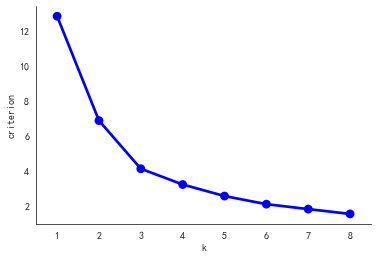

In [13]:
sns.pointplot(x="k", y="criterion", data=L, color='b')
sns.despine()

In [14]:
clus = KMeans(n_clusters=3)
clus = clus.fit(data.iloc[:, 0:2])
data["pred"] = clus.predict(data.iloc[:, 0:2])

# data.loc[data["pred"] == 0, "Pred"] = 11
# data.loc[data["pred"] == 1, "Pred"] = 0
# data.loc[data["pred"] == 2, "Pred"] = 2
# data.loc[data["Pred"] == 11, "Pred"] = 1
# data["Pred"] = data["Pred"].astype("int64")
data.head()

,萼片长,萼片宽,花瓣长,花瓣宽,种类,pred
0,0.222222,0.625000,0.067797,0.041667,山鸢尾,2
1,0.166667,0.416667,0.067797,0.041667,山鸢尾,2
2,0.111111,0.500000,0.050847,0.041667,山鸢尾,2
3,0.083333,0.458333,0.084746,0.041667,山鸢尾,2
4,0.194444,0.666667,0.067797,0.041667,山鸢尾,2


In [15]:
df = pd.crosstab(data["种类"], data["pred"])
df

pred,0,1,2
种类,,,
山鸢尾,1,0,49
杂色鸢尾,37,13,0
维吉尼亚鸢尾,16,34,0


In [16]:
L = []
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        if i != j:
            L.append(df.iloc[i, j])
print("预测准确率为：", round((150 - sum(L)) / 150 * 100, 1), "%")

预测准确率为： 9.3 %


In [17]:
L

[0, 49, 37, 0, 16, 34]